# Plot common colorbars for scatter expression plots and heatmaps

In [2]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct
reload(sct)

sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'

# Load data and find the max value 

In [4]:
df_logCPM_all = pd.read_csv("../data/htseq_logCPM_hq.tab.gz", sep="\t", header=0, index_col=0) # CPM

df_logCPM_all.shape

(15908, 4203)

In [5]:
df_libs = pd.read_csv("../data/libs_color3.csv", sep=",", header=0, index_col=0) # sample info
df_libs.shape

(3625, 14)

In [6]:
# Load names of high quality neurons 
names_hq_neurons = []
with open ("../data/names_hq_neurons.txt") as f:
    for line in f:
        names_hq_neurons.append(line.rstrip())
        
# Get names of GH146+ PNs
selector = ((df_libs["genotype"] == "GH146-GFP") & (df_libs["num_cells"] ==1))
names_PN = [x for x in list(df_logCPM_all.columns) if x in df_libs.loc[selector].index and x in names_hq_neurons]
print "PNs", len(names_PN)

# Get names of ORNs
selector0 = (df_libs["label"] == "nSyb_48h_ORN_P0") 
selector1 = (df_libs["label"] == "nSyb_48h_ORN_P1")
selector2 = (df_libs["label"] == "nSyb_48h_ORN_P2")
selector3 = (df_libs["label"] == "nSyb_48h_ORN_P4")
names_ORN = [x for x in list(df_logCPM_all.columns) if ((x in df_libs.loc[selector0].index) 
                      or (x in df_libs.loc[selector1].index) 
                      or (x in df_libs.loc[selector2].index)
                      or (x in df_libs.loc[selector3].index))
                      and x in names_hq_neurons]
print "ORN", len(names_ORN)

# Get names new P4 85A10_ORNs
selector = (df_libs["label"] == "85A10_48h_ORN_P4") 
names_85A10_ORN = [x for x in list(df_logCPM_all.columns) if ((x in df_libs.loc[selector].index) and x in names_hq_neurons)]
print "New_85A10_ORN_P4", len(names_85A10_ORN)

# Get names AM29_ORNs
selector = (df_libs["label"] == "Am29_48h_ORN_P4") 
names_AM29_ORN = [x for x in list(df_logCPM_all.columns) if ((x in df_libs.loc[selector].index) and x in names_hq_neurons)]
print "AM29_ORN", len(names_AM29_ORN)

PNs 976
ORN 908
New_85A10_ORN_P4 63
AM29_ORN 45


In [7]:
# Filter for these cells
names_PN_nsyb_ORN = names_PN + names_ORN 
names_All_ORN = names_ORN + names_85A10_ORN +names_AM29_ORN
names_PN_All_ORN = names_PN + names_All_ORN

df_PN_ORN = df_logCPM_all[list(names_PN_All_ORN)]


print "PN_All_ORN:", df_PN_ORN.shape[1]

PN_All_ORN: 1992


In [8]:
df1 = df_PN_ORN.max()
df1.max()

17.597727236899999

# For all heatmap color bar

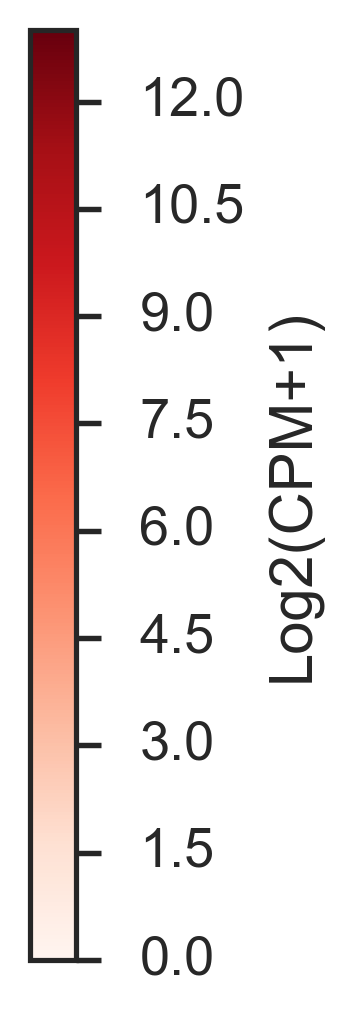

In [11]:
x = [0, 16]
y = [0, 16]
c = [0, 13]
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sc = ax.scatter(x, y, c=c, cmap="Reds")
plt.gca().set_visible(False)
fig.colorbar(sc, label="Log2(CPM+1)")
fig.savefig("../Figure/Fig1_Colorbar_Reds.pdf")

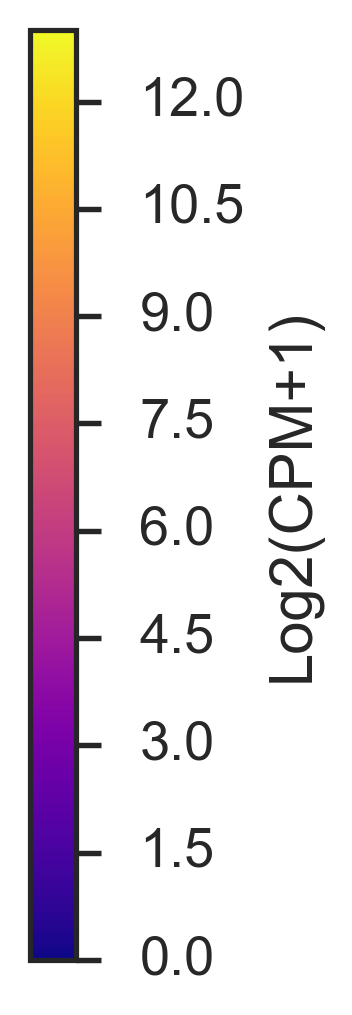

In [14]:
x = [0, 16] 
y = [10, 13]
c = [0, 13]
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sc = ax.scatter(x, y, c=c, cmap="plasma")
plt.gca().set_visible(False)
fig.colorbar(sc, label="Log2(CPM+1)")
fig.savefig("../Figure/Fig1_Colorbar_plasma.pdf")